### Name: Sreelekshmy S L
GRIP AUGUST 2021
## TASK2: Prediction using Unsupervised ML

Here we predict the optimum number of clusters in the Iris data set and represent it visually.

#### Import all the libraries required in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#### Load the iris dataset

In [2]:
iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Analyze the data

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


##  Finding the optimum number of clusters for k-means classification

In [7]:
X = iris.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
ssd=[]
for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

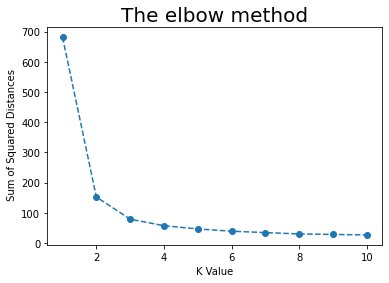

In [8]:
plt.plot(range(1,11),ssd,'o--')
plt.title('The elbow method',size=20)
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

#### In the above graph the optimum clusters is where the elbow occurs. And here the optimal number of clusters is "3"

## Creating the Kmeans classifier

In [9]:
kmeans = KMeans(n_clusters=3,random_state=1)
y_kmeans = kmeans.fit_predict(X)

### Visualizing the clusters along with their centroids.

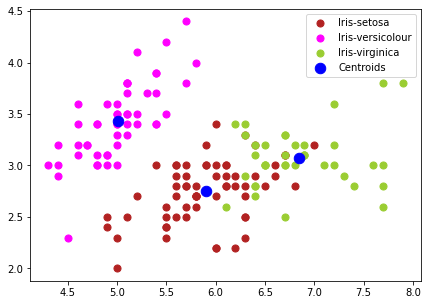

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 50, c = 'firebrick', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 50, c = 'magenta', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 50, c = 'yellowgreen', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 110, c = 'blue', label = 'Centroids')

plt.legend(loc=1)

### Thank you